### Machine Learning Project Summary

#### Introduction
This project aimed to develop a machine learning model for predicting customer churn in a subscription-based service. With the increasing competition in the market, understanding customer behavior and retaining users became critical for business sustainability. The goal was to utilize historical customer data to identify factors contributing to churn and create a predictive model that could help the company take proactive measures.

#### Challenges
Several challenges emerged throughout the project:

1. **Data Quality**: The dataset contained missing values, inconsistent entries, and irrelevant features that required extensive cleaning and preprocessing.
   
2. **Feature Selection**: Identifying which features had the most significant impact on churn proved difficult. This required experimentation with various techniques to determine the best predictors.
   
3. **Model Overfitting**: Initial models performed well on training data but struggled to generalize to unseen data, indicating oicant concern.

#### Solutions
To address these challenges, the following solutions were implemented:

1. **Data Cleaning**: We employed techniques such as imputation for missing values, outlier detection, and normalization to ensure the dataset's quality.
   
2. **Feature Engineering**: New features were created based on domain knowledge and exploratory data analysis, helping to enhance the model's predictive power.
   
3. **Regularization Techniques**: To combat overfitting, we used techniques such as L1 and L2 regularization and cross-validation to evaluate model perfes of the minority class.

#### Roadblocks
Despite progress, several roadblocks arose during the project:

1. **Computational Resources**: The complexity of models increased the demand for computational resources, leading to longer training times and requiring optimization.
   
2. **Model Interpretability**: Some models, while accurate, lacked interpretability. This posed a challenge for stakeholders who needed to understand the reasons behind lo technical rigor with business needs.

#### Conclusion
The application of machine learning in stock market analysis has shown considerable promise in enhancing predictive accuracy and aiding investment decisions. Through techniques such as time series forecasting, sentiment analysis, and algorithmic trading, machine learning models have the potential to uncover patterns and trends that traditional methods may overlook.Despite the advancements, challenges remain. The stock market inherent volatility, coupled with external economic factors, introduces a level of uncertainty that can impact model performance. Additionally, issues related to data quality, overfitting, and the interpretability of complex models can hinder their practical application.

## Problem Statements:

Develop a linear regression model to predict Amazon stock prices based on
historical commodity prices and volumes. The project will cover the entire ML
process, from EDA and feature engineering to model development and
evaluation.

##1. Import Libraries

In [11]:
#importing the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


## 2. Data Preparation

# Reading the data

In [15]:
data = pd.read_csv("Stock Market Dataset.csv")

In [16]:
data.head()

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


In [17]:
data.tail()

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
1238,1238,08-02-2019,2.583,147880.0,52.72,621000.0,2.8140,270.0,"3,661.70",699230.0,...,"3,00,771",240.0,347.57,7560000.0,79.41,113150000.0,167.33,12560000.0,"1,318.50",150610.0
1239,1239,07-02-2019,2.551,211790.0,52.64,749010.0,2.8320,320.0,"3,397.70",471360.0,...,"3,02,813",240.0,344.71,7860000.0,80.72,92530000.0,166.38,17520000.0,"1,314.20",166760.0
1240,1240,06-02-2019,2.662,98330.0,54.01,606720.0,2.8400,100.0,"3,404.30",514210.0,...,"3,08,810",120.0,352.19,6720000.0,82.01,78800000.0,170.49,13280000.0,"1,314.40",137250.0
1241,1241,05-02-2019,2.662,82250.0,53.66,609760.0,2.8205,90.0,"3,468.40",460950.0,...,"3,10,700",360.0,355.81,9050000.0,82.94,89060000.0,171.16,22560000.0,"1,319.20",129010.0
1242,1242,04-02-2019,2.660,116490.0,54.56,622470.0,2.7975,490.0,"3,462.80",503920.0,...,"3,12,000",310.0,351.34,9050000.0,81.67,98580000.0,169.25,20040000.0,"1,319.30",159560.0


In [18]:
data.shape

(1243, 39)

## Check the Data Type

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1243 non-null   int64  
 1   Date               1243 non-null   object 
 2   Natural_Gas_Price  1243 non-null   float64
 3   Natural_Gas_Vol.   1239 non-null   float64
 4   Crude_oil_Price    1243 non-null   float64
 5   Crude_oil_Vol.     1220 non-null   float64
 6   Copper_Price       1243 non-null   float64
 7   Copper_Vol.        1206 non-null   float64
 8   Bitcoin_Price      1243 non-null   object 
 9   Bitcoin_Vol.       1243 non-null   float64
 10  Platinum_Price     1243 non-null   object 
 11  Platinum_Vol.      636 non-null    float64
 12  Ethereum_Price     1243 non-null   object 
 13  Ethereum_Vol.      1243 non-null   float64
 14  S&P_500_Price      1243 non-null   object 
 15  Nasdaq_100_Price   1243 non-null   object 
 16  Nasdaq_100_Vol.    1242 

We see that Bitcoin_Price, Platinum_Price, Ethereum_Price, S&P_500_Price,Nasdaq_100_Price, erkshire_Price are of object dataType dude to the presence of comma in the dataset.

## Missing Value Treatment

In [23]:
data.isnull().sum()

Unnamed: 0             0
Date                   0
Natural_Gas_Price      0
Natural_Gas_Vol.       4
Crude_oil_Price        0
Crude_oil_Vol.        23
Copper_Price           0
Copper_Vol.           37
Bitcoin_Price          0
Bitcoin_Vol.           0
Platinum_Price         0
Platinum_Vol.        607
Ethereum_Price         0
Ethereum_Vol.          0
S&P_500_Price          0
Nasdaq_100_Price       0
Nasdaq_100_Vol.        1
Apple_Price            0
Apple_Vol.             0
Tesla_Price            0
Tesla_Vol.             0
Microsoft_Price        0
Microsoft_Vol.         0
Silver_Price           0
Silver_Vol.           47
Google_Price           0
Google_Vol.            0
Nvidia_Price           0
Nvidia_Vol.            0
Berkshire_Price        0
Berkshire_Vol.         0
Netflix_Price          0
Netflix_Vol.           0
Amazon_Price           0
Amazon_Vol.            0
Meta_Price             0
Meta_Vol.              0
Gold_Price             0
Gold_Vol.              2
dtype: int64

In [24]:
#Percentage of null value 
pd.DataFrame((data.isnull().sum()/data.shape[0])*100).reset_index()

,index,0
0,Unnamed: 0,0.000000
1,Date,0.000000
2,Natural_Gas_Price,0.000000
3,Natural_Gas_Vol.,0.321802
4,Crude_oil_Price,0.000000
5,Crude_oil_Vol.,1.850362
6,Copper_Price,0.000000
7,Copper_Vol.,2.976669
8,Bitcoin_Price,0.000000
9,Bitcoin_Vol.,0.000000


In [25]:
#I dropped these because these did not seem important and iam not dealing with time-series analysis
data = data.drop('Unnamed: 0', axis = 1)
data = data.drop('Date', axis = 1)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Natural_Gas_Price  1243 non-null   float64
 1   Natural_Gas_Vol.   1239 non-null   float64
 2   Crude_oil_Price    1243 non-null   float64
 3   Crude_oil_Vol.     1220 non-null   float64
 4   Copper_Price       1243 non-null   float64
 5   Copper_Vol.        1206 non-null   float64
 6   Bitcoin_Price      1243 non-null   object 
 7   Bitcoin_Vol.       1243 non-null   float64
 8   Platinum_Price     1243 non-null   object 
 9   Platinum_Vol.      636 non-null    float64
 10  Ethereum_Price     1243 non-null   object 
 11  Ethereum_Vol.      1243 non-null   float64
 12  S&P_500_Price      1243 non-null   object 
 13  Nasdaq_100_Price   1243 non-null   object 
 14  Nasdaq_100_Vol.    1242 non-null   float64
 15  Apple_Price        1243 non-null   float64
 16  Apple_Vol.         1243 

In [27]:
columns_to_convert = ['Bitcoin_Price', 'Platinum_Price', 'Ethereum_Price', 
                      'S&P_500_Price', 'Nasdaq_100_Price', 'Berkshire_Price', 'Gold_Price']

In [28]:
#converting it into numeric and removing the comma 
for col in columns_to_convert:
    data[col] = pd.to_numeric(data[col].str.replace(',', ''), errors='coerce')


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Natural_Gas_Price  1243 non-null   float64
 1   Natural_Gas_Vol.   1239 non-null   float64
 2   Crude_oil_Price    1243 non-null   float64
 3   Crude_oil_Vol.     1220 non-null   float64
 4   Copper_Price       1243 non-null   float64
 5   Copper_Vol.        1206 non-null   float64
 6   Bitcoin_Price      1243 non-null   float64
 7   Bitcoin_Vol.       1243 non-null   float64
 8   Platinum_Price     1243 non-null   float64
 9   Platinum_Vol.      636 non-null    float64
 10  Ethereum_Price     1243 non-null   float64
 11  Ethereum_Vol.      1243 non-null   float64
 12  S&P_500_Price      1243 non-null   float64
 13  Nasdaq_100_Price   1243 non-null   float64
 14  Nasdaq_100_Vol.    1242 non-null   float64
 15  Apple_Price        1243 non-null   float64
 16  Apple_Vol.         1243 

In [32]:
data.isnull().sum()

Natural_Gas_Price      0
Natural_Gas_Vol.       4
Crude_oil_Price        0
Crude_oil_Vol.        23
Copper_Price           0
Copper_Vol.           37
Bitcoin_Price          0
Bitcoin_Vol.           0
Platinum_Price         0
Platinum_Vol.        607
Ethereum_Price         0
Ethereum_Vol.          0
S&P_500_Price          0
Nasdaq_100_Price       0
Nasdaq_100_Vol.        1
Apple_Price            0
Apple_Vol.             0
Tesla_Price            0
Tesla_Vol.             0
Microsoft_Price        0
Microsoft_Vol.         0
Silver_Price           0
Silver_Vol.           47
Google_Price           0
Google_Vol.            0
Nvidia_Price           0
Nvidia_Vol.            0
Berkshire_Price        0
Berkshire_Vol.         0
Netflix_Price          0
Netflix_Vol.           0
Amazon_Price           0
Amazon_Vol.            0
Meta_Price             0
Meta_Vol.              0
Gold_Price             0
Gold_Vol.              2
dtype: int64

## Exploratory Data Analysis (EDA)

In [46]:
data_target = data['Amazon_Price']
data_feature = data.drop('Amazon_Price', axis = 1)

In [48]:
# checking for duplicates in the dataset
df_dup = data[data.duplicated()]
df_dup

,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,Platinum_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.


In [50]:
#Impute the null values with mean 
numeric_columns = data.select_dtypes(include=['number']).columns
for column in numeric_columns:
    mean_value = data[column].mean()  # Calculate mean
    data[column] = data[column].fillna(mean_value)  # Fill NaN with mean


In [52]:
data.isnull().sum()

Natural_Gas_Price    0
Natural_Gas_Vol.     0
Crude_oil_Price      0
Crude_oil_Vol.       0
Copper_Price         0
Copper_Vol.          0
Bitcoin_Price        0
Bitcoin_Vol.         0
Platinum_Price       0
Platinum_Vol.        0
Ethereum_Price       0
Ethereum_Vol.        0
S&P_500_Price        0
Nasdaq_100_Price     0
Nasdaq_100_Vol.      0
Apple_Price          0
Apple_Vol.           0
Tesla_Price          0
Tesla_Vol.           0
Microsoft_Price      0
Microsoft_Vol.       0
Silver_Price         0
Silver_Vol.          0
Google_Price         0
Google_Vol.          0
Nvidia_Price         0
Nvidia_Vol.          0
Berkshire_Price      0
Berkshire_Vol.       0
Netflix_Price        0
Netflix_Vol.         0
Amazon_Price         0
Amazon_Vol.          0
Meta_Price           0
Meta_Vol.            0
Gold_Price           0
Gold_Vol.            0
dtype: int64

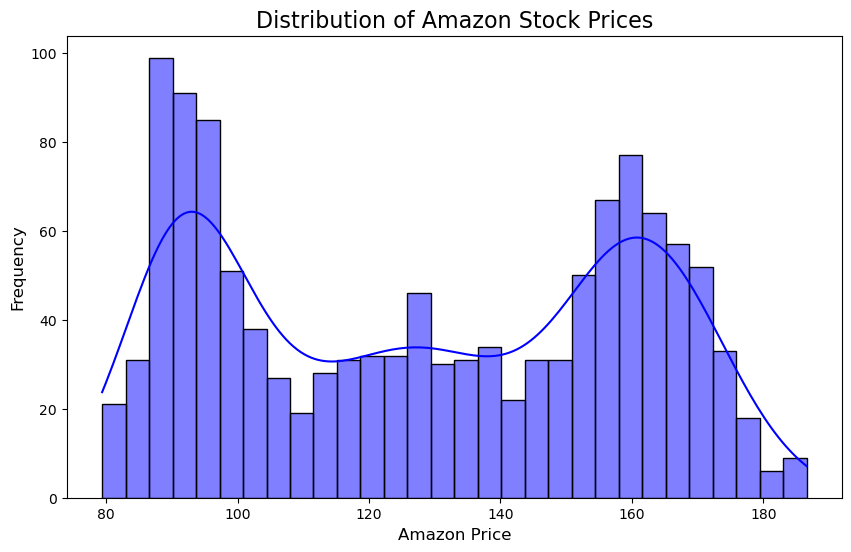

In [54]:
#Visualize the distribution of the target variable (Amazon_Price)
plt.figure(figsize=(10, 6))
sns.histplot(data['Amazon_Price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Amazon Stock Prices', fontsize=16)
plt.xlabel('Amazon Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


The histogram of Amazon_Price shows a left-skewed distribution.
Most Amazon stock prices are concentrated around the 80 to 160 range, with fewer instances of higher values.
Inference: may affect model accuracy is not normalized 

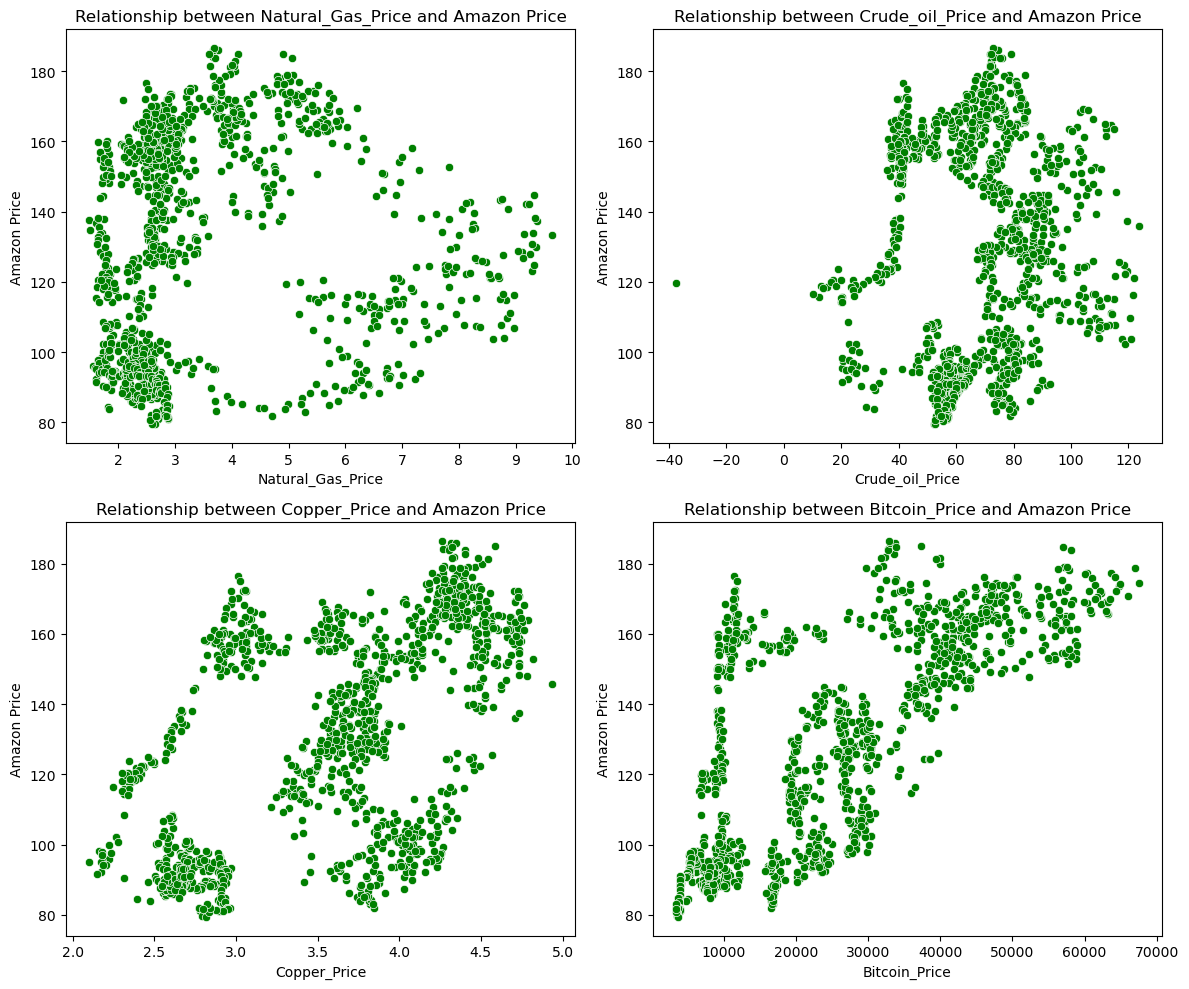

In [57]:
features_to_plot = ['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Bitcoin_Price']
plt.figure(figsize=(12, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x= data[feature], y=data['Amazon_Price'], color='green')
    plt.title(f'Relationship between {feature} and Amazon Price')
    plt.xlabel(feature)
    plt.ylabel('Amazon Price')
plt.tight_layout()
plt.show()

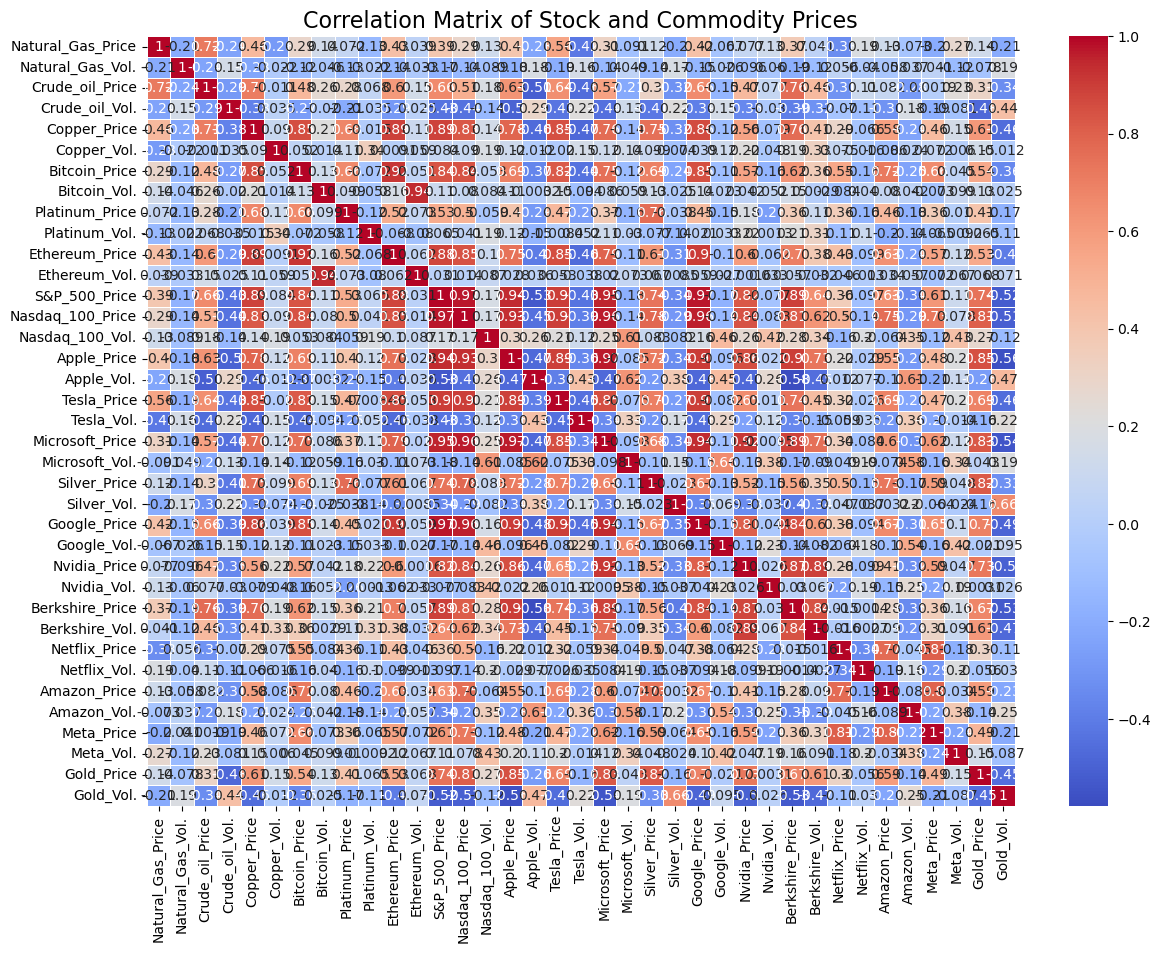

In [58]:
plt.figure(figsize=(14, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Stock and Commodity Prices', fontsize=16)
plt.show()


In [60]:

amazon_correlations = correlation_matrix['Amazon_Price'].sort_values(ascending=False)
print(amazon_correlations)

Amazon_Price         1.000000
Meta_Price           0.795618
Netflix_Price        0.770758
Nasdaq_100_Price     0.754037
Silver_Price         0.733125
Bitcoin_Price        0.716299
Tesla_Price          0.688165
Google_Price         0.665685
Ethereum_Price       0.632728
S&P_500_Price        0.630431
Microsoft_Price      0.599515
Gold_Price           0.592969
Copper_Price         0.579606
Apple_Price          0.552444
Platinum_Price       0.463763
Nvidia_Price         0.407860
Berkshire_Price      0.279611
Natural_Gas_Price    0.129552
Berkshire_Vol.       0.089812
Crude_oil_Price      0.082066
Bitcoin_Vol.         0.079938
Ethereum_Vol.        0.034377
Silver_Vol.          0.003167
Meta_Vol.           -0.034181
Natural_Gas_Vol.    -0.058459
Nasdaq_100_Vol.     -0.064014
Microsoft_Vol.      -0.074436
Copper_Vol.         -0.085817
Amazon_Vol.         -0.088988
Apple_Vol.          -0.100603
Google_Vol.         -0.102164
Nvidia_Vol.         -0.150851
Netflix_Vol.        -0.191493
Platinum_V

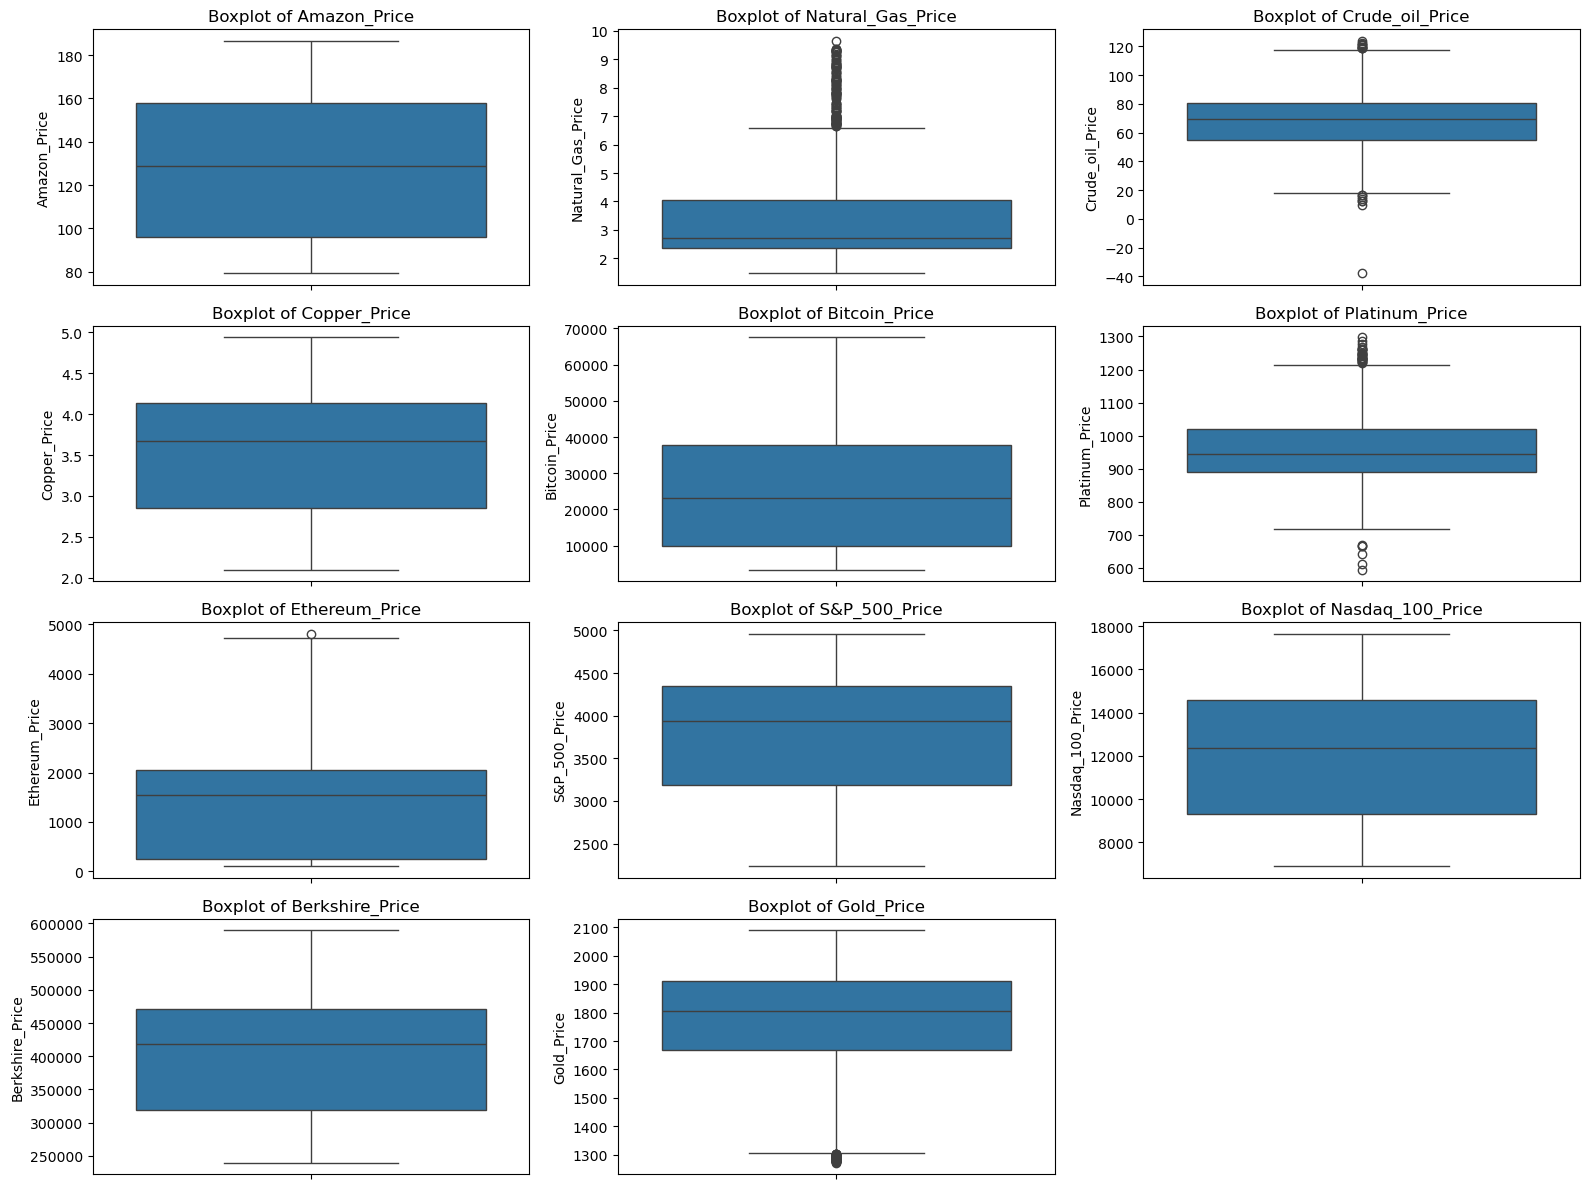

In [63]:
numeric_columns = ['Amazon_Price', 'Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price',
                   'Bitcoin_Price', 'Platinum_Price', 'Ethereum_Price', 
                   'S&P_500_Price', 'Nasdaq_100_Price', 'Berkshire_Price', 'Gold_Price']

# Plotting boxplots for each numeric column to visually check for outliers
plt.figure(figsize=(16, 12))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

## Feature Engineering

In [64]:
# Define the numeric columns to check for outliers

numeric_columns = [
    'Amazon_Price', 'Natural_Gas_Price', 'Crude_oil_Price', 'Platinum_Price', 'Gold_Price'
]

# Define a function to handle outliers using IQR method
def handle_outliers_iqr(df, columns):
    for column in columns:
        # Calculate the first (Q1) and third quartile (Q3) and IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with bounds
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
        
    return df

# Handle outliers in the specified columns
data_handled_outliers = handle_outliers_iqr(data.copy(), numeric_columns)

# Display the summary statistics after handling outliers
print(data_handled_outliers[numeric_columns].describe())


       Amazon_Price  Natural_Gas_Price  Crude_oil_Price  Platinum_Price  \
count   1243.000000        1243.000000      1243.000000     1243.000000   
mean     128.683234           3.373411        67.623387      958.533829   
std       30.808631           1.523489        20.211162      105.417255   
min       79.410000           1.482000        17.055000      693.837500   
25%       96.260000           2.347500        55.095000      889.775000   
50%      128.730000           2.702000        69.230000      944.700000   
75%      158.110000           4.055500        80.455000     1020.400000   
max      186.570000           6.617500       118.495000     1216.337500   

        Gold_Price  
count  1243.000000  
mean   1759.980692  
std     201.569422  
min    1304.800000  
25%    1669.600000  
50%    1804.200000  
75%    1912.800000  
max    2089.700000  


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Natural_Gas_Price  1243 non-null   float64
 1   Natural_Gas_Vol.   1243 non-null   float64
 2   Crude_oil_Price    1243 non-null   float64
 3   Crude_oil_Vol.     1243 non-null   float64
 4   Copper_Price       1243 non-null   float64
 5   Copper_Vol.        1243 non-null   float64
 6   Bitcoin_Price      1243 non-null   float64
 7   Bitcoin_Vol.       1243 non-null   float64
 8   Platinum_Price     1243 non-null   float64
 9   Platinum_Vol.      1243 non-null   float64
 10  Ethereum_Price     1243 non-null   float64
 11  Ethereum_Vol.      1243 non-null   float64
 12  S&P_500_Price      1243 non-null   float64
 13  Nasdaq_100_Price   1243 non-null   float64
 14  Nasdaq_100_Vol.    1243 non-null   float64
 15  Apple_Price        1243 non-null   float64
 16  Apple_Vol.         1243 

In [66]:
correlation_matrix = data.corr()

In [68]:
amazon_correlations = correlation_matrix['Amazon_Price'].sort_values(ascending=False)
print(amazon_correlations)

Amazon_Price         1.000000
Meta_Price           0.795618
Netflix_Price        0.770758
Nasdaq_100_Price     0.754037
Silver_Price         0.733125
Bitcoin_Price        0.716299
Tesla_Price          0.688165
Google_Price         0.665685
Ethereum_Price       0.632728
S&P_500_Price        0.630431
Microsoft_Price      0.599515
Gold_Price           0.592969
Copper_Price         0.579606
Apple_Price          0.552444
Platinum_Price       0.463763
Nvidia_Price         0.407860
Berkshire_Price      0.279611
Natural_Gas_Price    0.129552
Berkshire_Vol.       0.089812
Crude_oil_Price      0.082066
Bitcoin_Vol.         0.079938
Ethereum_Vol.        0.034377
Silver_Vol.          0.003167
Meta_Vol.           -0.034181
Natural_Gas_Vol.    -0.058459
Nasdaq_100_Vol.     -0.064014
Microsoft_Vol.      -0.074436
Copper_Vol.         -0.085817
Amazon_Vol.         -0.088988
Apple_Vol.          -0.100603
Google_Vol.         -0.102164
Nvidia_Vol.         -0.150851
Netflix_Vol.        -0.191493
Platinum_V

In [69]:
from sklearn.preprocessing import StandardScaler

# Define features (X) and target variable (y)
col = ['Amazon_Price', 'Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price',
                   'Bitcoin_Price', 'Platinum_Price']
X = data[col] 

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame for better readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of the scaled features
print(X_scaled_df.head())



   Amazon_Price  Natural_Gas_Price  Crude_oil_Price  Copper_Price  \
0      1.400391          -0.777093         0.229891      0.397906   
1      0.993523          -0.793012         0.305170      0.443456   
2      0.861039          -0.765566         0.404401      0.518185   
3      0.984431          -0.778191         0.500699      0.525302   
4      1.057816          -0.551493         0.449861      0.479753   

   Bitcoin_Price  Platinum_Price  
0       1.120470       -0.531666  
1       1.113399       -0.339945  
2       1.082136       -0.244547  
3       1.104961       -0.252883  
4       1.127029       -0.191755  


## Model Development

## Split the Data

In [70]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = X_scaled_df.drop("Amazon_Price", axis = 1 )# Features
y = X_scaled_df["Amazon_Price"]  # Target variable

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training feature set shape:", X_train.shape)
print("Testing feature set shape:", X_test.shape)
print("Training target variable shape:", y_train.shape)
print("Testing target variable shape:", y_test.shape)


Training feature set shape: (994, 5)
Testing feature set shape: (249, 5)
Training target variable shape: (994,)
Testing target variable shape: (249,)


## Train the Model

In [73]:

#testing result

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the model using MAE, MSE, and RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Display the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)



Mean Absolute Error (MAE): 0.4384251625966725
Mean Squared Error (MSE): 0.3268080692220392
Root Mean Squared Error (RMSE): 0.5716712947332927


In [79]:
#training result

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
train_pred = model.predict(X_train)

# Evaluate the model using MAE, MSE, and RMSE
mae = mean_absolute_error(y_train, train_pred)
mse = mean_squared_error(y_train, train_pred)
rmse = np.sqrt(mse)

# Display the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.4619303354127124
Mean Squared Error (MSE): 0.3360719604130281
Root Mean Squared Error (RMSE): 0.5797171382778227


## Model Validation and Testing

In [81]:
from sklearn.model_selection import cross_val_score

# Initialize a Linear Regression model
model = LinearRegression()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

# Convert negative MAE scores to positive values
cv_scores_positive = -cv_scores

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores_positive.mean()
std_cv_score = cv_scores_positive.std()

# Display the results
print("Mean CV Score (MAE):", mean_cv_score)
print("Standard Deviation of CV Score (MAE):", std_cv_score)


Mean CV Score (MAE): 0.7079494793037814
Standard Deviation of CV Score (MAE): 0.20267091217544025


In [83]:


# Step 3: Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Use a portion of the testing data as recent data for validation
# For example, use the last 20% of the testing data as recent data
recent_data_size = int(len(X_test) * 0.2)  # Use the last 20% of the test set for recent validation
X_recent = X_test[-recent_data_size:]
y_recent = y_test[-recent_data_size:]

# Step 5: Predict on recent data
y_recent_pred = model.predict(X_recent)

# Step 6: Evaluate the model using MAE and RMSE
mae_recent = mean_absolute_error(y_recent, y_recent_pred)
rmse_recent = np.sqrt(mean_squared_error(y_recent, y_recent_pred))

# Output the results
print(f"Mean Absolute Error (MAE) on recent data: {mae_recent}")
print(f"Root Mean Squared Error (RMSE) on recent data: {rmse_recent}")


Mean Absolute Error (MAE) on recent data: 0.44903498838593064
Root Mean Squared Error (RMSE) on recent data: 0.5761602930106351


              Feature   Coefficient  Abs_Coefficient
4        Copper_Price -2.343871e+00     2.343871e+00
21       Silver_Price  9.152187e-01     9.152187e-01
0   Natural_Gas_Price  5.536888e-01     5.536888e-01
15        Apple_Price -4.246450e-01     4.246450e-01
25       Nvidia_Price -1.381635e-01     1.381635e-01
23       Google_Price -1.246843e-01     1.246843e-01
19    Microsoft_Price -1.086062e-01     1.086062e-01
2     Crude_oil_Price  9.328024e-02     9.328024e-02
12      S&P_500_Price -6.303307e-02     6.303307e-02
13   Nasdaq_100_Price  3.710042e-02     3.710042e-02
8      Platinum_Price -3.337726e-02     3.337726e-02
17        Tesla_Price -9.708271e-03     9.708271e-03
29      Netflix_Price  6.415725e-03     6.415725e-03
32         Meta_Price  3.156300e-03     3.156300e-03
10     Ethereum_Price -1.168577e-03     1.168577e-03
34         Gold_Price -3.765162e-04     3.765162e-04
28     Berkshire_Vol. -3.003409e-04     3.003409e-04
9       Platinum_Vol. -1.190609e-04     1.1906

C:\Users\HAMDAN MUSHARAF\AppData\Local\Temp\ipykernel_26888\3956120586.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Abs_Coefficient', y='Feature', palette='viridis')


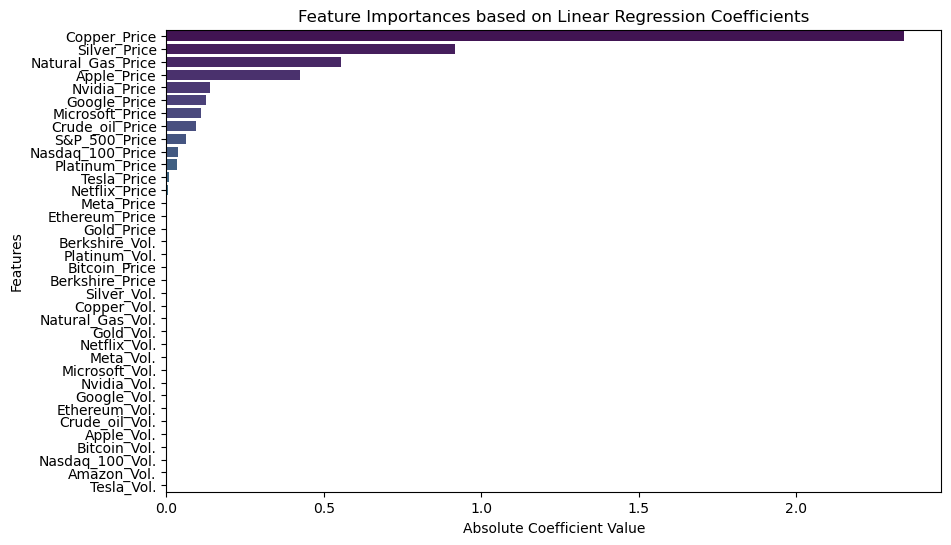

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame 'data' and the target variable 'Amazon_Price'
# and features are already defined in X

# Define target variable and features
X = data.drop('Amazon_Price', axis=1)  # Replace with your actual feature set
y = data['Amazon_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the coefficients and feature names
coefficients = model.coef_
features = X.columns

# Create a DataFrame for coefficients
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of the coefficients
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the DataFrame
print(coef_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='Abs_Coefficient', y='Feature', palette='viridis')
plt.title('Feature Importances based on Linear Regression Coefficients')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Features')
plt.show()
